In [2]:
import cv2
import numpy as np

#Init Camera
cap = cv2.VideoCapture(2)

# Face Detection
face_cascade = cv2.CascadeClassifier("./haarcascade_frontalface_default.xml")

skip = 0
face_data = []
dataset_path = './data/'
file_name = input("Enter the name of the person : ")
while True:
	ret,frame = cap.read()

	if ret==False:
		continue

	gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
	

	faces = face_cascade.detectMultiScale(frame,1.3,5)
	if len(faces)==0:
		continue
		
	faces = sorted(faces,key=lambda f:f[2]*f[3])

	# Pick the last face (because it is the largest face acc to area(f[2]*f[3]))
	for face in faces[-1:]:
		x,y,w,h = face
		cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)

		#Extract (Crop out the required face) : Region of Interest
		offset = 10
		face_section = frame[y-offset:y+h+offset,x-offset:x+w+offset]
		face_section = cv2.resize(face_section,(100,100))

		skip += 1
		if skip%10==0:
			face_data.append(face_section)
			print(len(face_data))


	cv2.imshow("Frame",frame)
	cv2.imshow("Face Section",face_section)

	key_pressed = cv2.waitKey(1) & 0xFF
	if key_pressed == ord('q'):
		break

# Convert our face list array into a numpy array
face_data = np.asarray(face_data)
face_data = face_data.reshape((face_data.shape[0],-1))
print(face_data.shape)

# Save this data into file system
np.save(dataset_path+file_name+'.npy',face_data)
print("Data Successfully save at "+dataset_path+file_name+'.npy')

cap.release()
cv2.destroyAllWindows()



Enter the name of the person : Chinu
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
(59, 30000)
Data Successfully save at ./data/Chinu.npy


In [ ]:
import cv2
import numpy as np 
import os 

########## KNN CODE ############
def distance(v1, v2):
	# Eucledian 
	return np.sqrt(((v1-v2)**2).sum())

def knn(train, test, k=5):
	dist = []
	
	for i in range(train.shape[0]):
		# Get the vector and label
		ix = train[i, :-1]
		iy = train[i, -1]
		# Compute the distance from test point
		d = distance(test, ix)
		dist.append([d, iy])
	# Sort based on distance and get top k
	dk = sorted(dist, key=lambda x: x[0])[:k]
	# Retrieve only the labels
	labels = np.array(dk)[:, -1]
	
	# Get frequencies of each label
	output = np.unique(labels, return_counts=True)
	# Find max frequency and corresponding label
	index = np.argmax(output[1])
	return output[0][index]
################################


#Init Camera
cap = cv2.VideoCapture(2)

# Face Detection
face_cascade = cv2.CascadeClassifier("./haarcascade_frontalface_default.xml")

skip = 0
dataset_path = './data/'

face_data = [] 
labels = []

class_id = 0 # Labels for the given file
names = {} #Mapping btw id - name


# Data Preparation
for fx in os.listdir(dataset_path):
	if fx.endswith('.npy'):
		#Create a mapping btw class_id and name
		names[class_id] = fx[:-4]
		print("Loaded "+fx)
		data_item = np.load(dataset_path+fx)
		face_data.append(data_item)

		#Create Labels for the class
		target = class_id*np.ones((data_item.shape[0],))
		class_id += 1
		labels.append(target)

face_dataset = np.concatenate(face_data,axis=0)
face_labels = np.concatenate(labels,axis=0).reshape((-1,1))

print(face_dataset.shape)
print(face_labels.shape)

trainset = np.concatenate((face_dataset,face_labels),axis=1)
print(trainset.shape)

# Testing 

while True:
	ret,frame = cap.read()
	if ret == False:
		continue

	faces = face_cascade.detectMultiScale(frame,1.3,5)
	if(len(faces)==0):
		continue

	for face in faces:
		x,y,w,h = face

		#Get the face ROI
		offset = 10
		face_section = frame[y-offset:y+h+offset,x-offset:x+w+offset]
		face_section = cv2.resize(face_section,(100,100))

		#Predicted Label (out)
		out = knn(trainset,face_section.flatten())

		#Display on the screen the name and rectangle around it
		pred_name = names[int(out)]
		cv2.putText(frame,pred_name,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2,cv2.LINE_AA)
		cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)

	cv2.imshow("Faces",frame)

	key = cv2.waitKey(1) & 0xFF
	if key==ord('q'):
		break

cap.release()
cv2.destroyAllWindows()

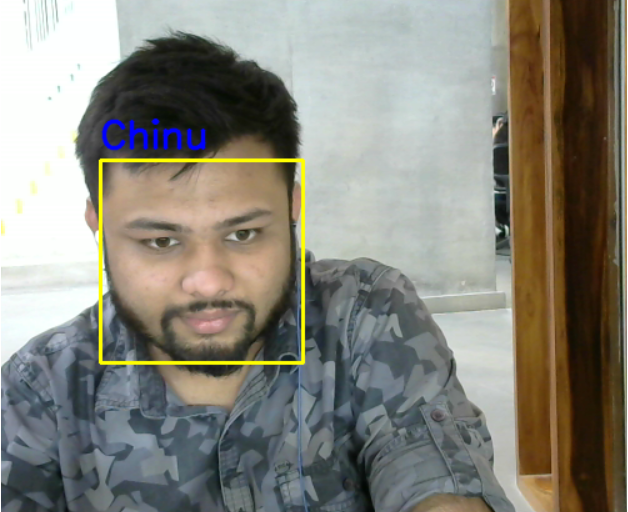

In [19]:
from IPython.display import Image
Image(filename='chinu.png')  

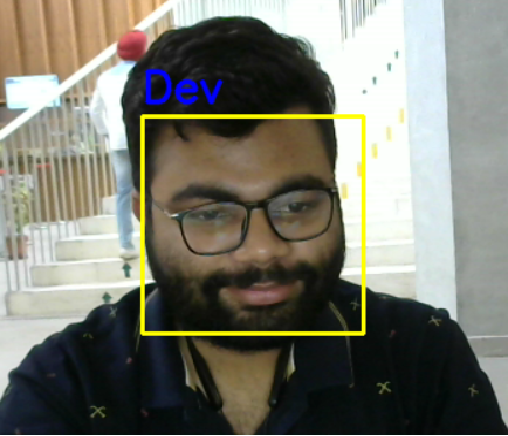

In [20]:
Image(filename='dev.png') 

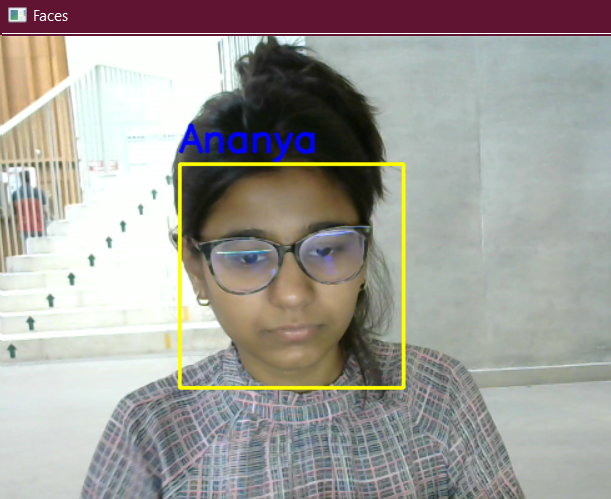

In [21]:
Image(filename='ananya.png')